<a href="https://colab.research.google.com/github/Azzam426/project-fsd/blob/main/analisis_data_bunga_indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# ==========================
# Import Library
# ==========================
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# ==========================
# 1. LOAD DATASET
# ==========================
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Ganti label spesies menjadi bunga Indonesia
label_mapping = {
    0: "melati",
    1: "kenanga",
    2: "anggrek"
}

df["target"] = iris.target
df["species"] = df["target"].map(label_mapping)

print("Contoh Data:")
print(df.head())
print("\nJumlah data:", df.shape)

Contoh Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  melati  
1       0  melati  
2       0  melati  
3       0  melati  
4       0  melati  

Jumlah data: (150, 6)



Statistik Deskriptif:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


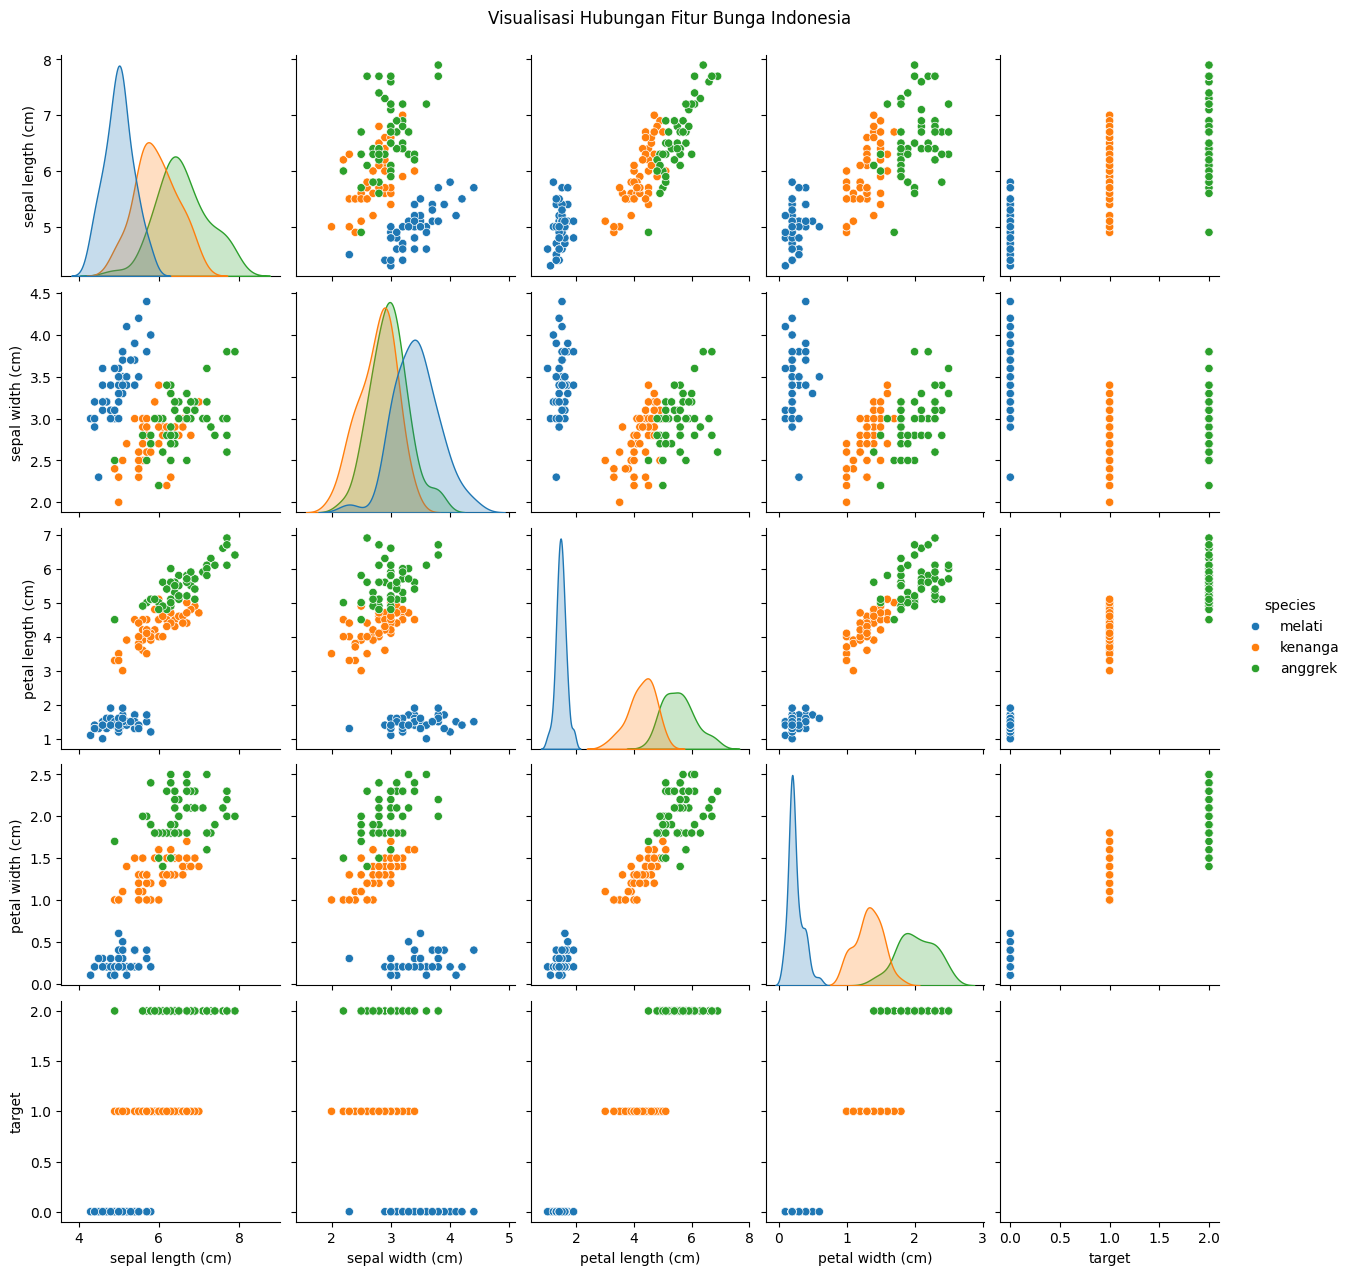

In [10]:
# ==========================
# 2. EKSPLORASI DATA
# ==========================
print("\nStatistik Deskriptif:\n")
print(df.describe())

sns.pairplot(df, hue="species")
plt.suptitle("Visualisasi Hubungan Fitur Bunga Indonesia", y=1.02)
plt.show()

In [5]:
# ==========================
# 3. PISAHKAN FITUR & LABEL
# ==========================
X = df.iloc[:, 0:4]
y = df["species"]

In [6]:
# ==========================
# 4. SPLIT DATA TRAIN & TEST
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Akurasi : 1.0

Classification Report:

              precision    recall  f1-score   support

     anggrek       1.00      1.00      1.00        11
     kenanga       1.00      1.00      1.00         9
      melati       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# ==========================
# 5. NORMALISASI DATA
# ==========================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# ==========================
# 6. BANGUN MODEL KNN
# ==========================
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


KNeighborsClassifier()

In [13]:
# ==========================
# 7. PREDIKSI
# ==========================
y_pred = model.predict(X_test)

In [14]:
# ==========================
# 8. EVALUASI MODEL
# ==========================
print("\nAkurasi :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Akurasi : 1.0

Classification Report:

              precision    recall  f1-score   support

     anggrek       1.00      1.00      1.00        11
     kenanga       1.00      1.00      1.00         9
      melati       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



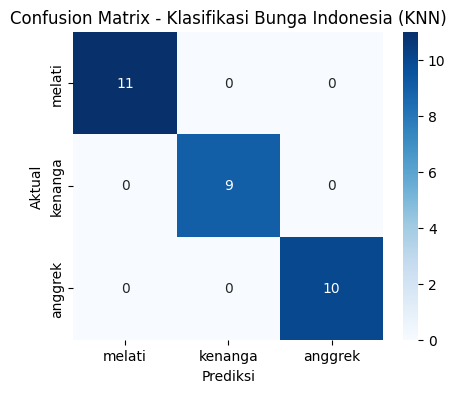

In [15]:
# ==========================
# 9. CONFUSION MATRIX
# ==========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["melati","kenanga","anggrek"],
    yticklabels=["melati","kenanga","anggrek"]
)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Klasifikasi Bunga Indonesia (KNN)")
plt.show()

In [16]:
# Install Gradio (jika belum)
!pip install gradio

import gradio as gr
import numpy as np

# --------------------------
# FUNGSI PREDIKSI
# --------------------------
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

    # gunakan scaler & model yang sudah dilatih sebelumnya
    data = scaler.transform(data)
    prediction = model.predict(data)[0]

    return f"✔ Hasil Prediksi: {prediction.upper()}"

# --------------------------
# DESAIN UI GRADIO
# --------------------------
interface = gr.Interface(
    fn=predict_flower,
    inputs=[
        gr.Number(label="Sepal Length"),
        gr.Number(label="Sepal Width"),
        gr.Number(label="Petal Length"),
        gr.Number(label="Petal Width"),
    ],
    outputs=gr.Textbox(label="Hasil Prediksi"),
    title="🌸 Klasifikasi Bunga Indonesia (KNN)",
    description="Masukkan nilai fitur bunga untuk memprediksi: melati / kenanga / anggrek"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://be86954e513c3dcbed.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
